<div class="alert alert-block alert-info">

# 1. Import libraries
</div>

In [50]:
import pandas as pd
import tamil
import matplotlib.pyplot as plt 
from collections import Counter
from lexicalrichness import LexicalRichness
from lexical_diversity import lex_div as ld
from scipy import stats 
import numpy as np

In [2]:
import seaborn as sns
from langid.langid import LanguageIdentifier, model
identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)

<div class="alert alert-block alert-info">

# 2. Loading the dataframe
</div>


**N**  Number of | 
**MWL** Mean Word Length | 
**MSL**  Mean Sentence Length | 
**SummersLD**  Summer's Lexical Diversity measure

In [3]:
headers = ["Genre","Ntokens","Ntypes","MWLtokens","MWLtypes","Nsentences","MSL","SummersLD"]
df = pd.read_csv('D:\\Preprocessed\\corpusStats.csv',skiprows=1,names=headers)
df.index+=1

In [4]:
df

,Genre,Ntokens,Ntypes,MWLtokens,MWLtypes,Nsentences,MSL,SummersLD
1,PROVERBS,18989,10409,4.603086,5.225574,2939,6.461041,0.972478
2,LETTERS,11330,2543,4.877493,5.684624,1307,8.668707,0.921878
3,MAGAZINES,848017,156304,4.879566,6.533339,89744,9.449289,0.949215
4,ARTS,725878,167684,5.362799,6.767265,70285,10.327637,0.955729
5,RESEARCH JOURNALS,3561744,585619,5.396161,7.142161,280507,12.697523,0.952938
6,REVIEWS,630312,122767,4.622661,6.222087,53810,11.713659,0.949465
7,SHORT STORIES,11593642,1363852,4.476467,6.988417,1281134,9.049516,0.949285
8,TN TEXT BOOKS,5495375,528800,5.223678,7.526577,457396,12.014480,0.940309
9,RELIGION,1775434,274121,5.561409,7.749910,137983,12.867049,0.947821
10,FINANCE,978160,51591,5.376129,7.071253,43514,22.479202,0.908531


<div class="alert alert-block alert-info">

# 3. Modules to calculate basic statistics  

</div>


<div class="alert alert-block alert-info">

### 3.1 Module to calculate 6 stats 
1. It calculates the total number of tokens, types, and sentences
2. It also calculates the mean token length, type length and sentence lengths
This module was used for the other genres as well. An example usage for the genre **Essays** is shown here

In [5]:
def count_words(filename):
    total_word_count = 0
    unique_words = set()  # To store unique words
    total_word_len = 0
    total_type_len = 0
    total_sent_count = 0
    totalSentLength = 0
    # Open the file in read mode
    with open(filename, 'r', encoding='utf-8') as file:
        # Read the file in chunks to avoid memory overflow
        while True:
            chunk = file.read(1024 * 1024)  # Reading 1 MB chunk at a time
            if not chunk:
                break
            SentencesList=chunk.split('.')
            for i in range(len(SentencesList)):
                sent=SentencesList[i].strip()
                sentenceLength=tamil.utf8.get_letters_length(sent)
                if sentenceLength!=0 and sentenceLength>=3:
                    #print('hi',sentenceLength)
                    total_sent_count+=1
                    # Split the chunk into words (basic splitting by whitespace)
                    words = sent.split()
                    totalSentLength+=len(words)
                    # Count total words in this chunk
                    total_word_count += len(words)
            
                    for w in words:
                        total_word_len+=len(tamil.utf8.get_letters(w))
                    # Add words to the set to keep track of unique words
                    unique_words.update(words)
    file.close()
    for w in unique_words:
        total_type_len+=len(tamil.utf8.get_letters(w))
    wordLen_Tokens = total_word_len/total_word_count
    wordLen_Types = total_type_len/len(unique_words)
    avgSentLen = totalSentLength/total_sent_count
    myList = [total_word_count,len(unique_words),wordLen_Tokens,wordLen_Types,total_sent_count,avgSentLen]
    # Return total word count and the number of unique words
    return myList

<div class="alert alert-block alert-info">

### 3.2 Module to calculate summers LD
This module was used for the other genres as well. An example usage for the genre **Essays** is shown here
</div>


In [6]:
import math

def summers_ld(t, w):
    """
    Calculate Summer's Lexical Diversity Measure and round to 2 decimal places.

    Parameters:
    t (int): The total number of unique types.
    w (int): The total number of tokens.

    Returns:
    float: Summer's Lexical Diversity Measure rounded to 2 decimal places.
    """
    ld = math.log(math.log(t)) / math.log(math.log(w))
    return round(ld, 2)


In [7]:
essayStats = count_words("D:\\Preprocessed\\Essays.txt")

In [8]:
essayStats

[446474,
 85620,
 4.765090464394343,
 6.199696332632563,
 43213,
 10.331937148543263]

In [9]:
essayStats.append(summers_ld(int(essayStats[1]),int(essayStats[0])))

In [10]:
essayStats.insert(0,"ESSAYS")

In [11]:
essayStats

['ESSAYS',
 446474,
 85620,
 4.765090464394343,
 6.199696332632563,
 43213,
 10.331937148543263,
 0.95]

In [12]:
from csv import writer
with open("D:\\Preprocessed\\corpusStats.csv", 'a') as f:

    writerObj = writer(f)
    writerObj.writerow(essayStats)
    f.close()

<div class="alert alert-block alert-info">

### 3.3 This is the entire CSV file with the corpus stats

</div>


In [13]:
headers = ["Genre","Ntokens","Ntypes","MWLtokens","MWLtypes","Nsentences","MSL","SummersLD"]
df = pd.read_csv('D:\\Preprocessed\\corpusStats.csv',skiprows=1,names=headers)
df.index+=1

<div class="alert alert-block alert-info">

### 3.4 TTR calculation
</div>


In [14]:
df ['TTR'] = df['Ntypes'] / df['Ntokens']
df = df.round({'Ntokens':2,'Ntypes':2,'MWLtokens':2,'MWLtypes':2,'MSL':2,'SummersLD':2, 'TTR':2})
df

,Genre,Ntokens,Ntypes,MWLtokens,MWLtypes,Nsentences,MSL,SummersLD,TTR
1,PROVERBS,18989,10409,4.60,5.23,2939,6.46,0.97,0.55
2,LETTERS,11330,2543,4.88,5.68,1307,8.67,0.92,0.22
3,MAGAZINES,848017,156304,4.88,6.53,89744,9.45,0.95,0.18
4,ARTS,725878,167684,5.36,6.77,70285,10.33,0.96,0.23
5,RESEARCH JOURNALS,3561744,585619,5.40,7.14,280507,12.70,0.95,0.16
6,REVIEWS,630312,122767,4.62,6.22,53810,11.71,0.95,0.19
7,SHORT STORIES,11593642,1363852,4.48,6.99,1281134,9.05,0.95,0.12
8,TN TEXT BOOKS,5495375,528800,5.22,7.53,457396,12.01,0.94,0.10
9,RELIGION,1775434,274121,5.56,7.75,137983,12.87,0.95,0.15
10,FINANCE,978160,51591,5.38,7.07,43514,22.48,0.91,0.05


In [15]:
df.dtypes

Genre          object
Ntokens         int64
Ntypes          int64
MWLtokens     float64
MWLtypes      float64
Nsentences      int64
MSL           float64
SummersLD     float64
TTR           float64
dtype: object

<div class="alert alert-block alert-info">

# 4. Exploratory Data analysis

</div>


<div class="alert alert-block alert-info">
    
### 4.1. Bar Plot of Genre vs. Number of Tokens
</div>

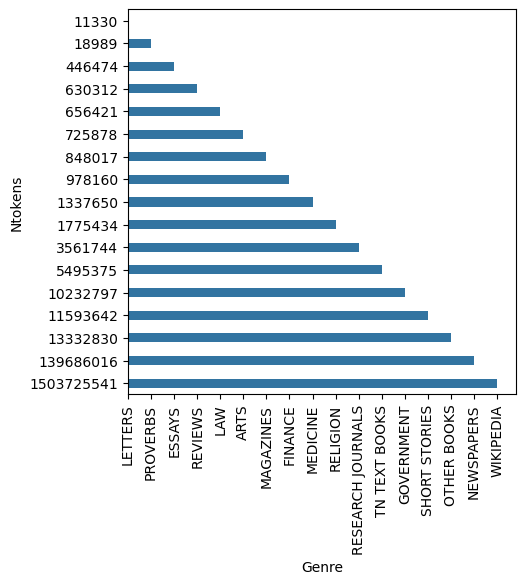

In [16]:
plt.figure(figsize=(5, 5))
ax=sns.barplot(x='Genre', y='Ntokens', data=df,  width=0.4, orient='y')
#plt.title('Number of Tokens by Genre')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">

### 4.2 Bar plot of TTR by Genre

</div>

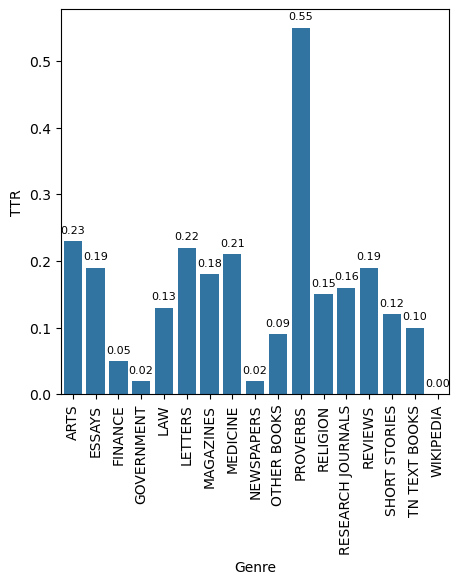

In [17]:
plt.figure(figsize=(5,5))
df_avg_ttr = df.groupby('Genre')['TTR'].mean().reset_index()
plots = sns.barplot(x='Genre', y='TTR', data=df_avg_ttr)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
# plt.title('TTR by Genre')
plt.xticks(rotation=90)
plt.show()


<div class="alert alert-block alert-info">

### 4.3 MWL (TYPES) ACROSS GENRES 

</div>

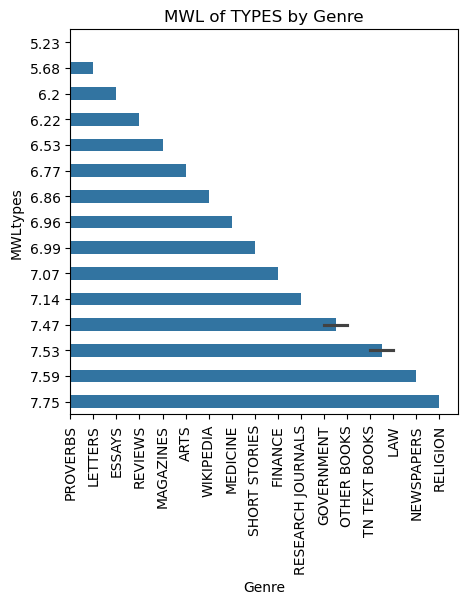

In [18]:
plt.figure(figsize=(5, 5))
ax=sns.barplot(x='Genre', y='MWLtypes', data=df,  width=0.5, orient='y').set(title='Width = 0.4')
plt.title('MWL of TYPES by Genre')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">

### 4.4 MSL ACROSS GENRES 

</div>

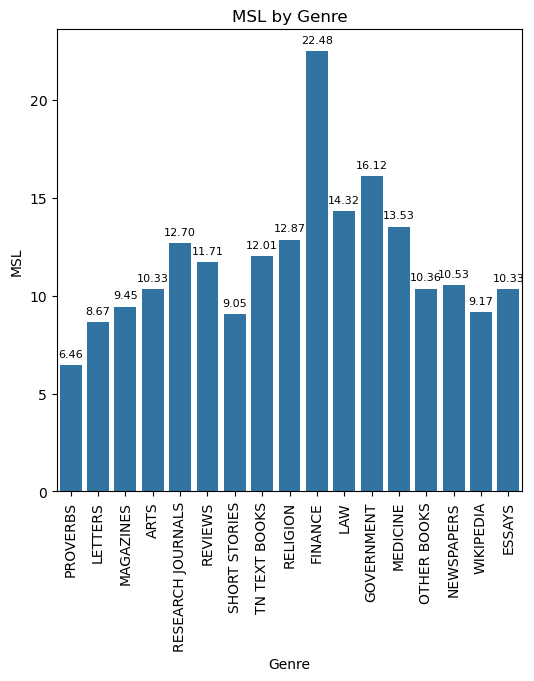

In [20]:
plt.figure(figsize=(6,6))
plots = sns.barplot(x='Genre', y='MSL', data=df)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title('MSL by Genre')
plt.xticks(rotation=90)
plt.show()


<div class="alert alert-block alert-info">

### 4.5 MSL and MWL ACROSS GENRES 

</div>

In [27]:
def plot_mwl_msl(data):
    
    sorted_mwl = data.sort_values(by='MWLtypes')
    sorted_msl = data.sort_values(by='MSL')
    
    
    min_mwl = sorted_mwl.head(2)
    max_mwl = sorted_mwl.tail(2)
    
    
    min_msl = sorted_msl.head(2)
    max_msl = sorted_msl.tail(2)
    
    fig, ax1 = plt.subplots(figsize=(10,10))

    
    bars = ax1.bar(data['Genre'], data['MWLtypes'], color='skyblue', label='Mean Word Length (MWLtypes)')
    ax1.set_xlabel('Genre')
    ax1.set_ylabel('Mean Word Length', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    
    ax1.set_xticks(range(len(data['Genre'])))
    ax1.set_xticklabels(data['Genre'], rotation=45, ha='right')

    
    for i, row in pd.concat([min_mwl, max_mwl]).iterrows():
        ax1.text(i, row['MWLtypes'] + 0.1, f'{row["MWLtypes"]:.2f}', ha='center', va='bottom', color='blue', weight='bold')

    
    ax2 = ax1.twinx()
    ax2.plot(data['Genre'], data['MSL'], color='green', marker='o', linestyle='-', label='Mean Sentence Length (MSL)')
    ax2.set_ylabel('Mean Sentence Length', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    
    for i, row in pd.concat([min_msl, max_msl]).iterrows():
        ax2.text(i, row['MSL'] + 0.5, f'{row["MSL"]:.2f}', ha='center', va='bottom', color='green', weight='bold')
    
    
    ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
    ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))
    
    plt.title("Mean Word Length and Mean Sentence Length Across Genres")
    plt.show()

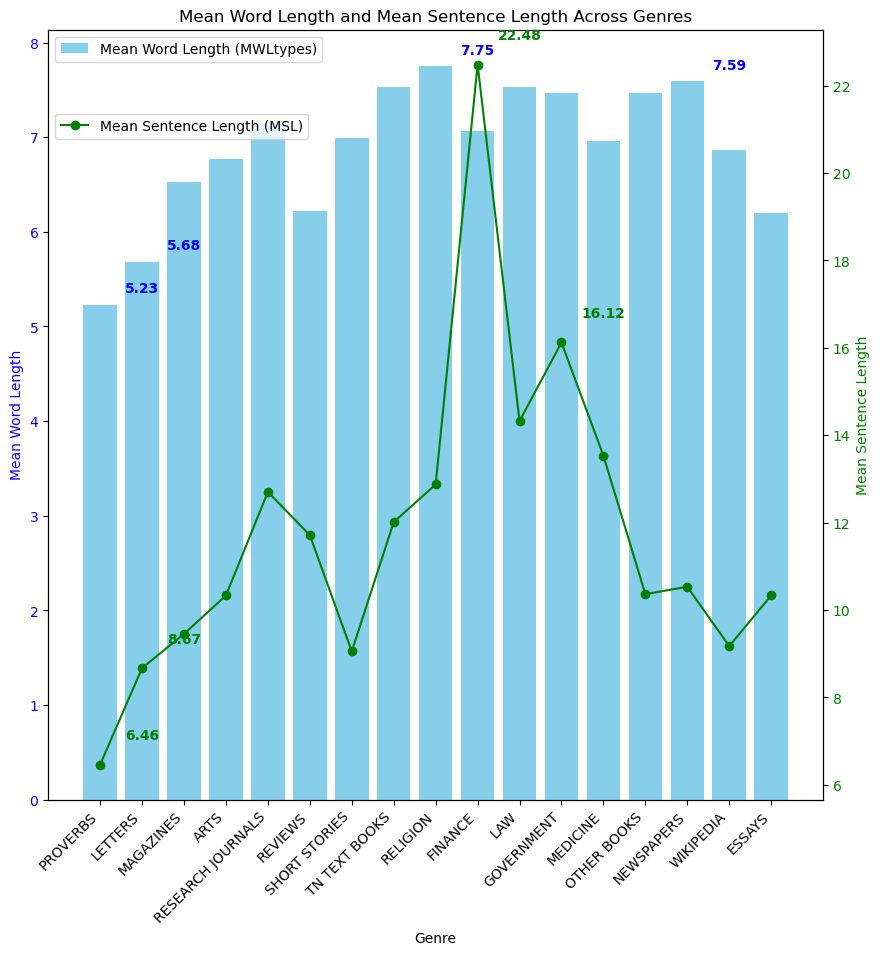

In [28]:
plot_mwl_msl(df)

<div class="alert alert-block alert-info">
    
### 4.6 Scatter Plot of Number of Tokens vs. TTR

</div>

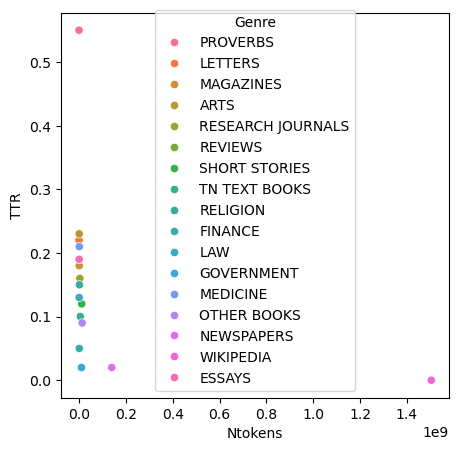

In [29]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Ntokens', y='TTR', hue='Genre', data=df)

plt.show()

<div class="alert alert-block alert-info">

### 4.7 Heatmap of Correlation Between Features

</div>

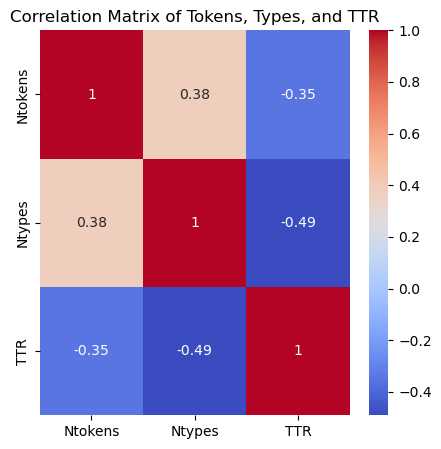

In [30]:
plt.figure(figsize=(5,5))
import numpy as np
import seaborn as sns

corr_matrix = df[['Ntokens', 'Ntypes', 'TTR']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Tokens, Types, and TTR')
plt.show()

<div class="alert alert-block alert-info">

### 4.8 Pairplot (Scatter Plot Matrix) for Numerical Features

</div>

<Figure size 700x700 with 0 Axes>

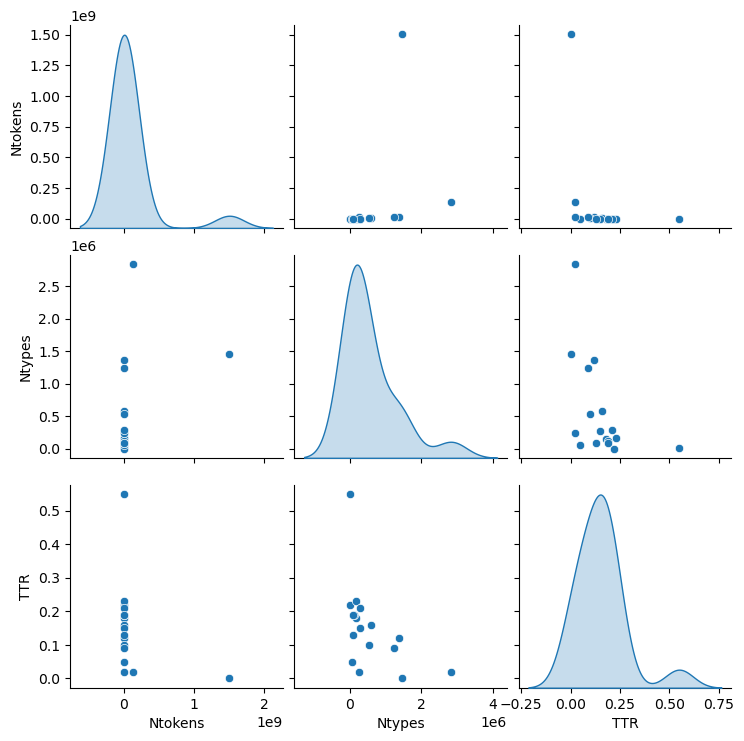

In [31]:
plt.figure(figsize=(7,7))
sns.pairplot(df[['Ntokens', 'Ntypes', 'TTR']], diag_kind='kde')
plt.show()


In [32]:
def plot_lexical_diversity(data):
    # Sort data to easily find min and max values
    sorted_data = data.sort_values(by='SummersLD')
    min_values = sorted_data.head(2)  
    max_values = sorted_data.tail(2)  
    
    # Plotting
    plt.figure(figsize=(12, 8))
    plt.axhline(y=0.9, color='black', linestyle='--', linewidth=1, label='Threshold (y=0.9)')
    plt.text(x=len(data) - 1, y=0.92, s='SUMMERsLD = 0.9', color='black', ha='right', va='bottom', fontsize=10)
    bars = plt.bar(data['Genre'], data['SummersLD'], color='steelblue')
    plt.xlabel('Genre')
    plt.ylabel("Summer's Lexical Diversity Measure")
    plt.title("Lexical Diversity (Summer's Measure) Across Genres")
    plt.xticks(rotation=45, ha='right')

    # Annotate the two minimum values
    for i, row in min_values.iterrows():
        plt.text(row['Genre'], row['SummersLD'] + 0.01, f'{row["SummersLD"]:.2f}', ha='center', va='bottom', color='red', weight='bold')

    # Annotate the two maximum values
    for i, row in max_values.iterrows():
        plt.text(row['Genre'], row['SummersLD'] + 0.01, f'{row["SummersLD"]:.2f}', ha='center', va='bottom', color='green', weight='bold')
    
    plt.show()

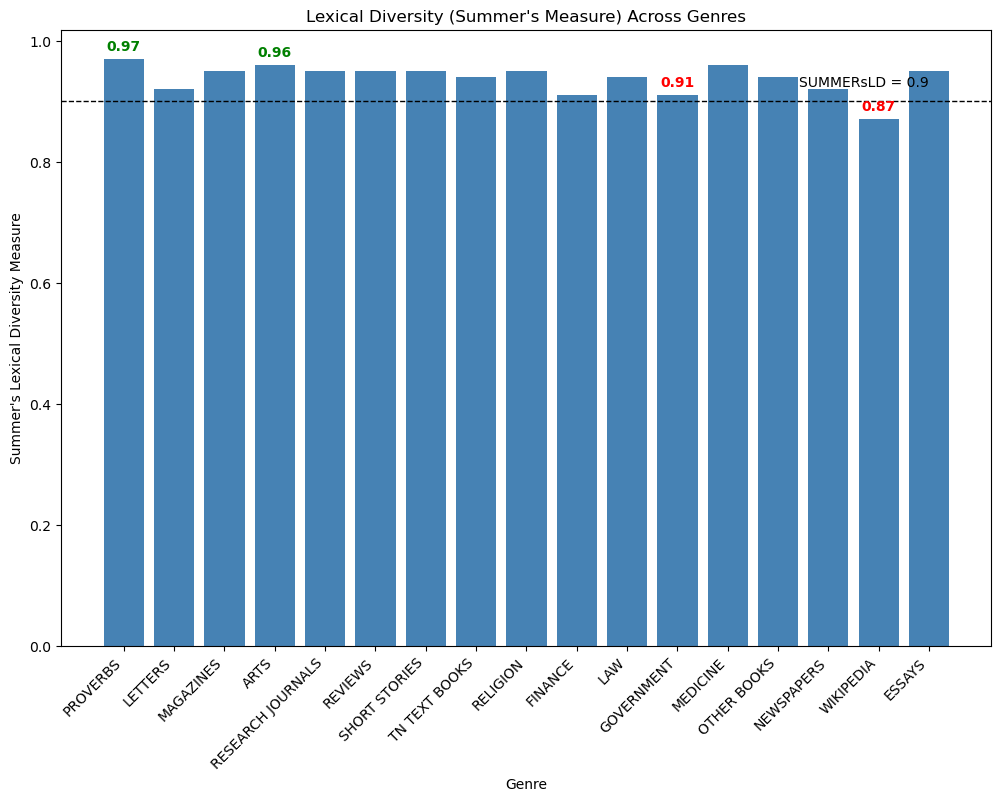

In [33]:
plot_lexical_diversity(df)


<div class="alert alert-block alert-info">

# 5. Is there a significant difference in TTR between Tamil and English

</div>


<div class="alert alert-block alert-info">

### Module to generate a list of TTR for 1 KB text chunks
</div>

In [35]:
def generate_ttr(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        ttr_list=[]
        while True:
            unique_words = set()  # To store unique words
            total_word_count = 0
            chunk = file.read(1024)  # Reading 1 KB chunk at a time
            if not chunk:
                break
            words = chunk.split()
            total_word_count += len(words)
            unique_words.update(words)
            total_type_count=len(unique_words)
            ttr=(total_type_count/total_word_count)*100
            ttr_list.append(ttr)
    
    return ttr_list

<div class="alert alert-block alert-info">

### Module to generate a list of MTLD for 1 KB text chunks
</div>

In [44]:
def generate_MTLD(filename):
    
    
    with open(filename, 'r', encoding='utf-8') as file:
        mtld_list=[]
        # Read the file in chunks to avoid memory overflow
        while True:
            chunk = file.read(1024)  
            if not chunk:
                break
            mtld_list.append(ld.mtld(chunk))
            
    return mtld_list

<div class="alert alert-block alert-info">

### Module to calculate effect size using cohen's d
https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/cohens-d/
</div>

In [66]:
def cohen_d(x, y):
    return (np.mean(x) - np.mean(y)) / np.sqrt((np.std(x, ddof=1) ** 2 + np.std(y, ddof=1) ** 2) / 2)

<div class="alert alert-block alert-info">

### Pre-processing Module 
</div>

In [36]:
import time
import string
import os
def cleanText(fileName,cleanedFolderName,index):
    """
    Function to clean/preprocess a text file 
    by removing punctuations, numbers, and non-Tamil text
    
    Args:
        fileName (string): Name of the text file to clean / preprocess along with the complete path
        cleanedFolderName (string): Name of the text file along with the complete path to write the cleaned text 
        index (integer) : Index to grab fileName
    Returns:
        None
    """
    st = time.time()
    fileDetails=[]
    english_tokens=[]
    name=fileName.split('\\')[index]
    cleanedFileName=cleanedFolderName+name
    PunctString=string.punctuation + '¬£'
    PunctString=PunctString.replace('.','')
    with open(fileName,mode='r') as f, open(cleanedFileName,mode='w') as f1:
        for l_no,l in enumerate(f):
            lineWithoutPunct=l.translate(str.maketrans('', '', PunctString)) # remove punctuations
            tokens=lineWithoutPunct.split()
            if(len(tokens)!=0):
                for tok in tokens:
                    langidTuple=identifier.classify(tok)
                    if(len(langidTuple))!=0 and langidTuple[0]=='en': # change it to 'ta' for tamil 
                        english_tokens.append(tok)
        for i in english_tokens:
            f1.write(i+' ')
    f.close()
    f1.close()             
    time_taken=time.time()-st
    print(f"Time taken for cleaning {name} is",time.strftime("%H:%M:%S", time.gmtime(time_taken)))
    fileStat = os.stat(fileName)
    print(f'Actual File {name} size is {round(fileStat.st_size/(1024*1024),4)} MB')
    cleanedFileStat = os.stat(cleanedFileName)
    print(f'Cleaned File {name} size is {round(fileStat.st_size/(1024*1024),4)} MB')
    fileDetails.append(cleanedFileName)
    fileDetails.append(name)
    fileDetails.append(english_tokens)

<div class="alert alert-block alert-info">

## 5.1 Comparing Brown and TamilCorp 
</div>

<div class="alert alert-block alert-success">

#### Extracting uniform samples of 615 KB text data from each genre in TamilCorp 
</div>

In [37]:
import os
import random

path = "D:\\TestFolder\\Files\\"
dir_list = os.listdir(path)
random.shuffle(dir_list)
for aFile in dir_list:
    with open(path+aFile, mode='r', encoding='utf-8') as f, open('D:\\Preprocessed\\TamilCorpusSampled615.txt', mode='a', encoding='utf-8') as op:
        chunk = f.read(615*1024)  # Reading 1 KB chunk at a time
        op.write(chunk)
    op.close()
    f.close()

<div class="alert alert-block alert-success">

#### Find TTR and MTLD for each 1KB text chunk in the uniformly sampled TamilCorp
</div>

In [57]:
TamilSampled_ttr_list=generate_ttr('D:\\Preprocessed\\TamilCorpusSampled615.txt')
TamilSampled_mtld_list=generate_MTLD('D:\\Preprocessed\\TamilCorpusSampled615.txt')

<div class="alert alert-block alert-success">

#### Preprocessing Brown corpus, COCA and COHA
</div>

In [102]:
cleanText('D:\\TestFolder\\Rawbrown.txt','D:\\Preprocessed\\',2) 

Time taken for cleaning Rawbrown.txt is 01:11:12
Actual File Rawbrown.txt size is 5.8991 MB
Cleaned File Rawbrown.txt size is 5.8991 MB


<div class="alert alert-block alert-success">

#### Find TTR and MTLD for each 1KB text chunk in the Brown corpus
</div>

In [58]:
brown_ttr_list=generate_ttr('D:\\Preprocessed\\Brown_Preprocessed.txt')
brown_mtld_list=generate_MTLD('D:\\Preprocessed\\Brown_Preprocessed.txt')

In [40]:
len(brown_ttr_list)

5078

<div class="alert alert-block alert-success">

## 5.1.1 t-test - TTR of TamilCorp and Brown corpus
</div>

In [41]:
brown_ttrList_test = brown_ttr_list[:100]

In [42]:
tamil_ttrList_test = TamilSampled_ttr_list[:100]

### Checking assumptions
### 1 . Shapiro wilk test to test normality of the samples

In [46]:
stats.shapiro(brown_ttrList_test)

ShapiroResult(statistic=0.9878137465321862, pvalue=0.49457717149461383)

In [47]:
stats.shapiro(tamil_ttrList_test)

ShapiroResult(statistic=0.9853448480774452, pvalue=0.33620370048840215)

"Since the p-value is not less than .05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that the sample data does not come from a normal distribution" quoted from https://www.statology.org/shapiro-wilk-test-python/

### 2. Levene’s Test for equal variances

In [49]:
levene_test_mean = stats.levene(brown_ttrList_test, tamil_ttrList_test, center='mean')
print(f"Levene's test: {levene_test_mean}")

Levene's test: LeveneResult(statistic=0.11762043551501376, pvalue=0.731993624728353)


"The p-value is not less than 0.05. This means in both cases we would fail to reject the null hypothesis. This means we do not have sufficient evidence to say that the variance is significantly different. In other words, both the groups have equal variances." quoted from  https://www.statology.org/

In [51]:
print(f"The mean and SD of Brown (group1) are {np.mean(brown_ttrList_test)} and {np.std(brown_ttrList_test,ddof=1)}") 
print(f"The mean and SD of Tamil (group2) are {np.mean(tamil_ttrList_test)} and {np.std(tamil_ttrList_test,ddof=1)}")

The mean and SD of Brown (group1) are 66.12089337590375 and 4.720157611799666
The mean and SD of Tamil (group2) are 87.3659035833353 and 4.948641891472706


### 3. t-test (Brown and Tamil TTR)

In [56]:
t_stat,p_val=stats.ttest_ind(brown_ttrList_test,tamil_ttrList_test)
print(f"T-stat={abs(t_stat)}, p-value={p_val}")

T-stat=31.06548655131498, p-value=4.658196061652369e-78


### $\color{green}{\text{p<0.001. The difference is significant}}$

### 4. Measuring the effect size using cohen's d (Brown and Tamil TTR)

In [68]:
effect_size = cohen_d(brown_ttrList_test,tamil_ttrList_test)
print(f"Effect size (Cohen's d): {abs(effect_size)}")

Effect size (Cohen's d): 4.393323240258862


## $\color{green}{\text{Very large effect :)}}$

<div class="alert alert-block alert-success">

## 5.1.2 t-test - MTLD of TamilCorp and Brown corpus
</div>

In [59]:
brown_mtldTest=brown_mtld_list[:100]
tamil_mtldTest=TamilSampled_mtld_list[:100]

In [84]:
print(f"The mean and SD of Brown (group1) are {np.mean(brown_mtldTest)} and {np.std(brown_mtldTest,ddof=1)}") 
print(f"The mean and SD of Tamil (group2) are {np.mean(tamil_mtldTest)} and {np.std(tamil_mtldTest,ddof=1)}")

The mean and SD of Brown (group1) are 13.876604441150977 and 0.5088690845869184
The mean and SD of Tamil (group2) are 15.30546742346717 and 0.7354198132266232


### Checking assumptions
### 1 . Shapiro wilk test to test normality of the samples

In [60]:
stats.shapiro(brown_mtldTest)

ShapiroResult(statistic=0.9861038147060855, pvalue=0.38022929567240304)

In [61]:
stats.shapiro(tamil_mtldTest)

ShapiroResult(statistic=0.9925246089075779, pvalue=0.8578045764826512)

### 2. Levene’s Test for equal variances

In [62]:
lev_mean = stats.levene(brown_mtldTest,tamil_mtldTest,center="mean")
print(lev_mean)

LeveneResult(statistic=11.525546823794814, pvalue=0.0008293142272846952)


#### $\color{red}{\text{Failed - Equal variances. So choose Welch's t-test }}$

### 3. Welch's t-test with unequal variances (Brown and Tamil MTLD)

In [63]:
t_stat, p_value = stats.ttest_ind(brown_mtldTest,tamil_mtldTest,equal_var=False)
print(f"T-stat={abs(t_stat)}, p-value={p_val}")

T-stat=15.977270480604941, p-value=4.658196061652369e-78


### $\color{green}{\text{p<0.001. The difference is significant}}$

### 4. Measuring the effect size using cohen's d (Brown and Tamil TTR)

In [69]:
effect_size = cohen_d(brown_mtldTest,tamil_mtldTest)
print(f"Effect size (Cohen's d): {abs(effect_size)}")

Effect size (Cohen's d): 2.259527260337481


## $\color{green}{\text{Very large effect :)}}$

<div class="alert alert-block alert-info">

## 5.2 Comparing COCA and TamilCorp 
</div>

In [71]:
import os
import random

path = "E:\\4th YEAR\\TAMIL CORPUS ANALYSIS\\COCA\\"
dir_list = os.listdir(path)
random.shuffle(dir_list)
for aFile in dir_list:
    with open(path+aFile, mode='r', encoding='utf-8') as f, open('D:\\COCAsample650.txt', mode='a', encoding='utf-8') as op:
        chunk = f.read(650*1024)  # Reading 1 KB chunk at a time
        op.write(chunk)
    op.close()
    f.close()

## Please note: The file is pre-processed using **cleanText**

In [72]:
COCA_ttr_list = generate_ttr('D:\\Preprocessed\\COCAsample650.txt')
COCA_MTLD_list = generate_MTLD('D:\\Preprocessed\\COCAsample650.txt')

<div class="alert alert-block alert-success">

## 5.2.1 t-test - TTR of TamilCorp and COCA
</div>

In [76]:
COCA_TTRtest=COCA_ttr_list[201:301] # We havbe the TTR test list for Tamil already

In [77]:
print(f"The mean and SD of COCA (group1) are {np.mean(COCA_TTRtest)} and {np.std(COCA_TTRtest,ddof=1)}") 
print(f"The mean and SD of Tamil (group2) are {np.mean(tamil_ttrList_test)} and {np.std(tamil_ttrList_test,ddof=1)}")

The mean and SD of COCA (group1) are 62.28416488994327 and 4.611916007633685
The mean and SD of Tamil (group2) are 87.3659035833353 and 4.948641891472706


### Checking assumptions
### 1 . Shapiro wilk test to test normality of the samples

In [78]:
stats.shapiro(COCA_TTRtest)

ShapiroResult(statistic=0.985261135122676, pvalue=0.3316062983592854)

### 2. Levene’s Test for equal variances

In [79]:
lev_mean = stats.levene(COCA_TTRtest,tamil_ttrList_test,center="mean")
print(lev_mean)

LeveneResult(statistic=0.08777795914944234, pvalue=0.7673317793609874)


### 3. t-test (COCA and Tamil TTR)

In [80]:
t_stat, p_value = stats.ttest_ind(COCA_TTRtest,tamil_ttrList_test)
print(f"T-stat={abs(t_stat)}, p-value={p_val}")

T-stat=37.078333210558284, p-value=4.658196061652369e-78


### $\color{green}{\text{p<0.001. The difference is significant}}$

### 4. Measuring the effect size using cohen's d (COCA and Tamil TTR)

In [81]:
effect_size = cohen_d(COCA_TTRtest,tamil_ttrList_test)
print(f"Effect size (Cohen's d): {abs(effect_size)}")

Effect size (Cohen's d): 5.243668169656027


## $\color{green}{\text{Very large effect :)}}$

<div class="alert alert-block alert-success">

## 5.2.2 t-test - MTLD of TamilCorp and COCA
</div>

In [85]:
COCA_mtldForTest=COCA_MTLD_list[101:201]
print(f"The mean and SD of COCA (group1) are {np.mean(COCA_mtldForTest)} and {np.std(COCA_mtldForTest,ddof=1)}") 
print(f"The mean and SD of Tamil (group2) are {np.mean(tamil_mtldTest)} and {np.std(tamil_mtldTest,ddof=1)}")

The mean and SD of COCA (group1) are 13.37709114948728 and 0.5667138570118793
The mean and SD of Tamil (group2) are 15.30546742346717 and 0.7354198132266232


### Checking assumptions
### 1 . Shapiro wilk test to test normality of the samples

In [86]:
stats.shapiro(COCA_mtldForTest)

ShapiroResult(statistic=0.984550747156276, pvalue=0.2946306057367295)

### 2. Levene’s Test for equal variances

In [87]:
lev_mean = stats.levene(COCA_mtldForTest,tamil_mtldTest,center="mean")
print(lev_mean)

LeveneResult(statistic=5.215570341679886, pvalue=0.023446663284552565)


#### $\color{red}{\text{Failed - Equal variances. So choose Welch's t-test }}$

### 3. Welch's t-test with unequal variances (Brown and Tamil MTLD)

In [88]:
t_stat, p_value = stats.ttest_ind(COCA_mtldForTest,tamil_mtldTest)
print(f"T-stat={abs(t_stat)}, p-value={p_val}")

T-stat=20.769995814001412, p-value=4.658196061652369e-78


### $\color{green}{\text{p<0.001. The difference is significant}}$

### 4. Measuring the effect size using cohen's d (COCA and Tamil TTR)

In [89]:
effect_size = cohen_d(COCA_mtldForTest,tamil_mtldTest)
print(f"Effect size (Cohen's d): {abs(effect_size)}")

Effect size (Cohen's d): 2.9373209770593207


## $\color{green}{\text{Very large effect :)}}$

<div class="alert alert-block alert-info">

## 5.3 Comparing COHA and TamilCorp 
</div>

In [90]:
import os
import random

path = "E:\\4th YEAR\\TAMIL CORPUS ANALYSIS\\COHA\\"
dir_list = os.listdir(path)
random.shuffle(dir_list)
for aFile in dir_list:
    with open(path+aFile, mode='r', encoding='utf-8') as f, open('D:\\COHAsample8.txt', mode='a', encoding='utf-8') as op:
        chunk = f.read(8*1024)  
        op.write(chunk)
    op.close()
    f.close()

## Please note: The file is pre-processed using **cleanText**

In [91]:
COHA_TTRList = generate_ttr("D:\\Preprocessed\\COHAsample8.txt")

In [92]:
COHA_mtldList = generate_MTLD("D:\\Preprocessed\\COHAsample8.txt")

In [94]:
COHA_TTR_test = COHA_TTRList[:100]
COHA_mtld_test = COHA_mtldList[:100]

<div class="alert alert-block alert-success">

## 5.3.1 t-test - TTR of TamilCorp and COHA
</div>

In [95]:
print(f"The mean and SD of COHA (group1) are {np.mean(COHA_TTR_test)} and {np.std(COHA_TTR_test,ddof=1)}") 
print(f"The mean and SD of Tamil (group2) are {np.mean(tamil_ttrList_test)} and {np.std(tamil_ttrList_test,ddof=1)}")

The mean and SD of COHA (group1) are 62.14135627838637 and 5.614738860698485
The mean and SD of Tamil (group2) are 87.3659035833353 and 4.948641891472706


### Checking assumptions
### 1 . Shapiro wilk test to test normality of the samples

In [96]:
stats.shapiro(COHA_TTR_test)

ShapiroResult(statistic=0.9783643655266181, pvalue=0.09904491964292021)

### 2. Levene’s Test for equal variances

In [97]:
lev_mean = stats.levene(COHA_TTR_test,tamil_ttrList_test,center="mean")
print(lev_mean)

LeveneResult(statistic=1.2950721062506148, pvalue=0.25649047827106386)


### 3. t-test

In [98]:
t_stat, p_value = stats.ttest_ind(COHA_TTR_test,tamil_ttrList_test)
print(f"T-stat={abs(t_stat)}, p-value={p_val}")

T-stat=33.70340151296322, p-value=4.658196061652369e-78


### $\color{green}{\text{p<0.001. The difference is significant}}$

### 4. Measuring the effect size using cohen's d 

In [99]:
effect_size = cohen_d(COHA_TTR_test,tamil_ttrList_test)
print(f"Effect size (Cohen's d): {abs(effect_size)}")

Effect size (Cohen's d): 4.766380751773847


## $\color{green}{\text{Very large effect :)}}$

<div class="alert alert-block alert-success">

## 5.3.2 t-test - MTLD of TamilCorp and COHA
</div>

In [100]:
print(f"The mean and SD of COHA (group1) are {np.mean(COHA_mtld_test)} and {np.std(COHA_mtld_test,ddof=1)}") 
print(f"The mean and SD of Tamil (group2) are {np.mean(tamil_mtldTest)} and {np.std(tamil_mtldTest,ddof=1)}")

The mean and SD of COHA (group1) are 13.406561919564616 and 0.5149865346327325
The mean and SD of Tamil (group2) are 15.30546742346717 and 0.7354198132266232


### Checking assumptions
### 1 . Shapiro wilk test to test normality of the samples

In [101]:
stats.shapiro(COHA_mtld_test)

ShapiroResult(statistic=0.9866676229910845, pvalue=0.4156650299658192)

### 2. Levene’s Test for equal variances

In [102]:
lev_mean = stats.levene(COHA_mtld_test,tamil_mtldTest,center="mean")
print(lev_mean)

LeveneResult(statistic=8.985835589164447, pvalue=0.00306928312476966)


#### $\color{red}{\text{Failed - Equal variances. So choose Welch's t-test }}$

### 3. t-test

In [104]:
t_stat, p_value = stats.ttest_ind(COHA_mtld_test,tamil_mtldTest,equal_var=False)
print(f"T-stat={abs(t_stat)}, p-value={p_val}")

T-stat=21.15053890284913, p-value=4.658196061652369e-78


### $\color{green}{\text{p<0.001. The difference is significant}}$

### 4. Measuring the effect size using cohen's d 

In [105]:
effect_size = cohen_d(COHA_mtld_test,tamil_mtldTest)
print(f"Effect size (Cohen's d): {abs(effect_size)}")

Effect size (Cohen's d): 2.9911378967909004


## $\color{green}{\text{Very large effect :)}}$